In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# importing the data set
data=pd.read_csv("C:\\Users\\Avinash\\Downloads\\kc_house_data.csv")

In [3]:
# EDA
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.shape

(21613, 21)

In [6]:
# checking missing values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# describing the the price column
print(data["price"].describe())

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [8]:
# count the number of unique value of id
ID=data["id"]
ID=set(ID)
print(len(ID))

#here id is the name of the house so we canot take this for regression analysis

21436


In [9]:
DATE=data["date"]
DATE=set(DATE)
print(len(DATE))

# so there are 372 unique values of date

372


(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

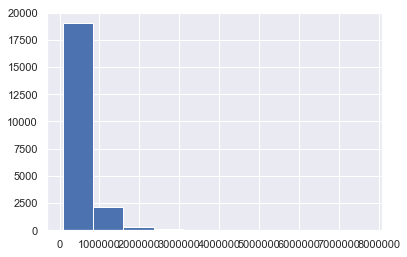

In [10]:
# histogram of price distrubution
sns.set()
plt.hist(data["price"])

#using bins square root rule

In [11]:
# square root thumb rule for histogram
PRICE=data["price"]
PRICE=len(PRICE)

PRICE=np.array(PRICE)
PRICE=np.sqrt(PRICE)
PRICE=round(PRICE)
PRICE=int(PRICE)
print(PRICE)
print(type(PRICE))

147
<class 'int'>


In [12]:
# instead of using above one we use this user defined function for all factors to plot histogram
# defining a function for square root bins
def bins_len(a):
    a=np.sqrt(a)
    return int(round(a))

In [13]:
data["price"].count()

21613

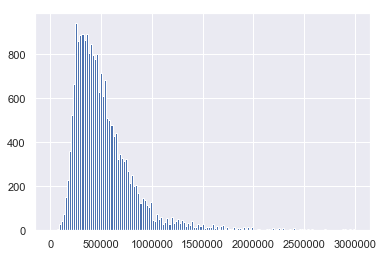

In [14]:
# plotting histogram
sns.set()
plt.hist(data["price"],bins=bins_len(data["price"].count()),range=(0,3000000))
plt.show()

BY ABOVE HISTOGRAM WE CAN SEE THAT THERE IS POSITVE SKEWED DATA DISTRUBUTION OF PRICE

{'whiskers': [<matplotlib.lines.Line2D at 0x22463162dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x22463176780>,
 'boxes': [<matplotlib.lines.Line2D at 0x22463162c50>],
 'medians': [<matplotlib.lines.Line2D at 0x22463176e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x22463176f98>],
 'means': []}

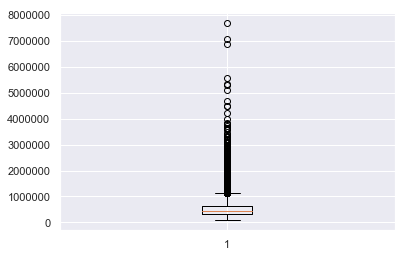

In [15]:
plt.boxplot(data["price"])

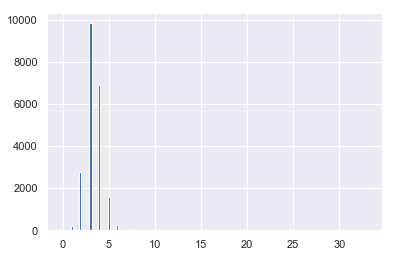

In [16]:
plt.hist(data["bedrooms"],bins=bins_len(data["bedrooms"].count()))
plt.show()

BY ABOVE BOXPLOT WE CAN SEE SOME OUTLERS IN PRICE VARIABLE

In [17]:
# bedrooms variable
data.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

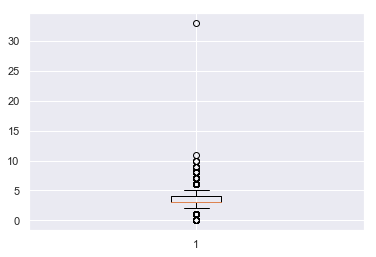

In [18]:
# bedroom is categorical type thats why we use boxplot for the data
sns.set()
plt.boxplot(data["bedrooms"])
plt.show()

In [19]:
# BY ABOVE VARIABLE THERE ALSO A OUTLIER IS THERE

In [20]:
# descrbing the bathrooms variable
# as we see the data above there are values in digits so bathrooms cant be in float so we have to convert that into normal
#values



In [21]:
# converting each value into int type
bath=data["bathrooms"]
bath1=[]
for i in bath:
    i=round(i)
    i=int(i)
    bath1.append(i)
    
data["bathrooms"]=bath1    

In [22]:
data["bathrooms"].head()

0    1
1    2
2    1
3    3
4    2
Name: bathrooms, dtype: int64

In [23]:
# describing the bathroom
data["bathrooms"].describe()

count    21613.000000
mean         2.058715
std          0.755524
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: bathrooms, dtype: float64

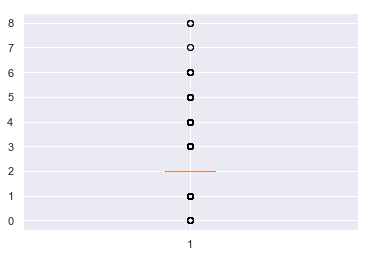

In [24]:
# boxplot of bathroom
sns.set()
plt.boxplot(data["bathrooms"])
plt.show()

In [25]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
data["sqft_living"].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

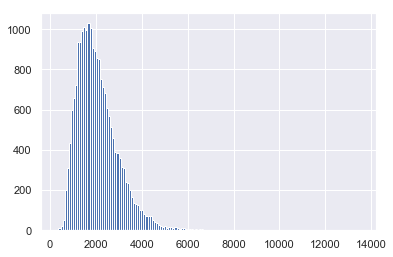

In [27]:
# histogram of the sqft of the home
sns.set()
plt.hist(data["sqft_living"],bins=bins_len(data["sqft_living"].count()))
plt.show()

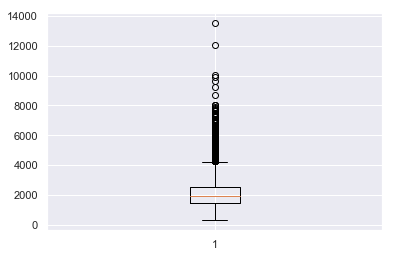

In [28]:
# the boxplot
sns.set()
plt.boxplot(data["sqft_living"])
plt.show()

In [29]:
# describing the sqft_lot
data["sqft_lot"].describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

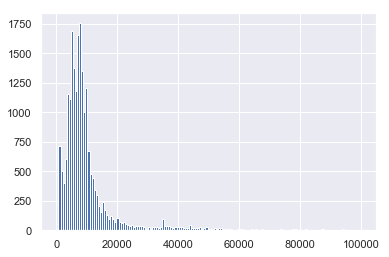

In [30]:
# histogram plot
sns.set()
plt.hist(data["sqft_lot"],bins=bins_len(data["sqft_lot"].count()),range=(0,100000))
plt.show()

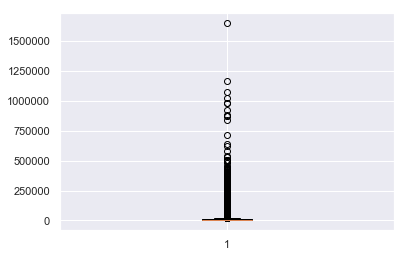

In [31]:
# boxplot
sns.set()
plt.boxplot(data["sqft_lot"])
plt.show()

In [32]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [33]:
data["floors"].describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [34]:
# floors var are in continuous type we should make that as descrete
floor=data["floors"]
floor1=[]
for i in floor:
    i=round(i)
    i=int(i)
    floor1.append(i)
data["floors"]=floor1    

In [35]:
data["floors"].describe()

count    21613.000000
mean         1.534956
std          0.554742
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: floors, dtype: float64

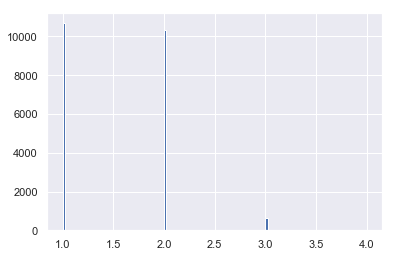

In [36]:
# histogram
sns.set()
plt.hist(data["floors"],bins=bins_len(data["floors"].count()))
plt.show()

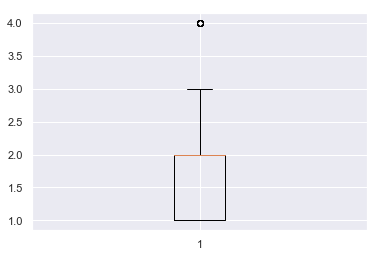

In [37]:
# boxplot
sns.set()
plt.boxplot(data["floors"])
plt.show()

In [38]:
# water front
data["waterfront"].unique()

# only zeroes and one we can see in the variable
# 0 means no water front and 
# 1 means there is water front

array([0, 1], dtype=int64)

In [39]:
# to count how many times 0s and 1s are been here
water=data["waterfront"]
water
water1=[]
water2=[]
for i in water:
    if i==0:
        water1.append(i)
    else:
        water2.append(i)
print(len(water1))
print(len(water2))
print(len(water1)-data["waterfront"].count())

# method2
print(data["waterfront"].value_counts())


# by these we can see that there only 143 homes are here which  has water front

21450
163
-163
0    21450
1      163
Name: waterfront, dtype: int64


In [40]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [41]:
data["view"].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [42]:
# to check how many times 0 has appeared
vew=data["view"]
vew1=[]
for i in vew:
    if i==0:
        vew1.append(i)
        
print(len(vew1))        
print(data["view"].count()-len(vew1)) 
print(data.shape)


# method2
data["view"].value_counts()[0]

19489
2124
(21613, 21)


19489

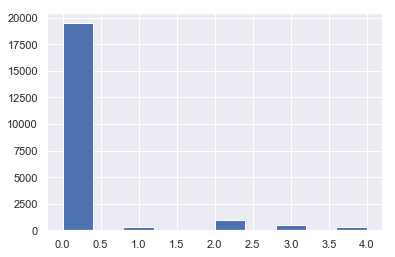

In [43]:
sns.set()
plt.hist(data["view"])
plt.show()

In [44]:
data["condition"].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [45]:
data["grade"].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [46]:
# sqft above
print(data["sqft_above"].describe())


count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64


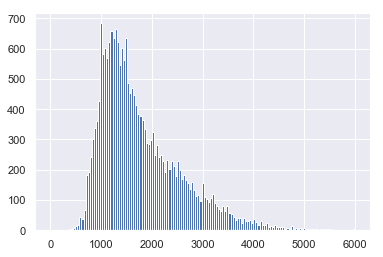

In [47]:
# histogram
sns.set()
plt.hist(data["sqft_above"],bins=bins_len(data["sqft_above"].count()),range=(0,6000))
plt.show()

C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


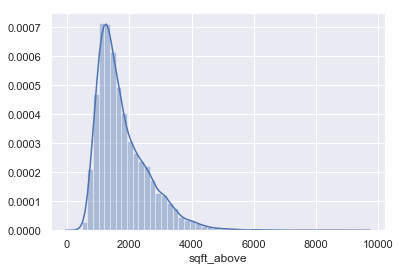

In [48]:
sns.distplot(data["sqft_above"])
plt.show()

In [49]:
# sqft basement
data["sqft_basement"].describe()

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [50]:
data["sqft_basement"].value_counts()[0]

# so here we can see that 13126 value are here that they contain 0 values so it means that either they conatin missing values
# or there houses have no basements

13126

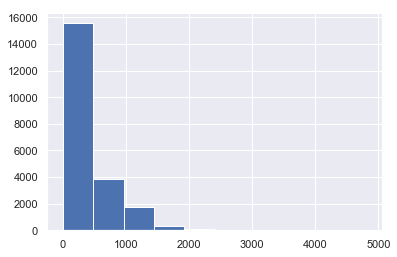

In [51]:
# hist plot
sns.set()
plt.hist(data["sqft_basement"])

plt.show()


In [52]:
data["yr_built"].value_counts()
print(data["yr_built"].min())
print(data["yr_built"].max())



1900
2015


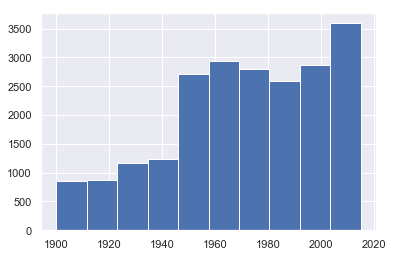

In [53]:
# histogram
sns.set()
plt.hist(data["yr_built"])
plt.show()

In [54]:
data["yr_renovated"].value_counts()


# here 0 means either missing  values or they didnot renovated

0       20699
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

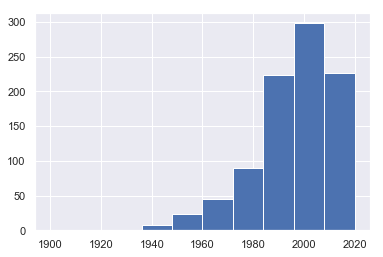

In [55]:
# histogram
sns.set()
plt.hist(data["yr_renovated"],range=([1900,2020]))

plt.show()

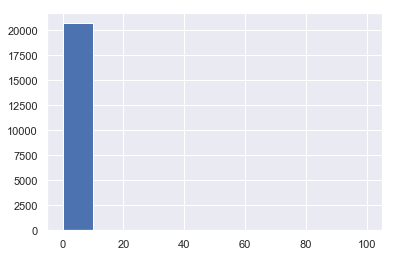

In [56]:
# continud version
plt.hist(data["yr_renovated"],range=([0,100]))
plt.show()

In [57]:
#zipcode
data["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [58]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

TILL NOW WE HAVE CHCKED THE DISTRUBUTION OF ALL VARIABLES
AND NOW WE SHOULD HAVE TO TREAT THE OUTLIER VALUES

In [59]:
# outlier treatment
# by above we have seen that number is near to 30 so we have to remove that
data.loc[(data["bedrooms"]<=40)& (data["bedrooms"]<=10),"bedrooms"].value_counts()


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
Name: bedrooms, dtype: int64

In [60]:
# now we have calculated the the bedrooms more than equal 10 now im adding nan into that drop that full row from data
# before remove outlier
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(17), object(1)
memory usage: 3.5+ MB


In [61]:
data.loc[(data["bedrooms"]<=35) & (data["bedrooms"]>=10)]=np.nan

In [62]:
# just observe the difference above and below one
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21608 non-null float64
date             21608 non-null object
price            21608 non-null float64
bedrooms         21608 non-null float64
bathrooms        21608 non-null float64
sqft_living      21608 non-null float64
sqft_lot         21608 non-null float64
floors           21608 non-null float64
waterfront       21608 non-null float64
view             21608 non-null float64
condition        21608 non-null float64
grade            21608 non-null float64
sqft_above       21608 non-null float64
sqft_basement    21608 non-null float64
yr_built         21608 non-null float64
yr_renovated     21608 non-null float64
zipcode          21608 non-null float64
lat              21608 non-null float64
long             21608 non-null float64
sqft_living15    21608 non-null float64
sqft_lot15       21608 non-null float64
dtypes: float64(20), object(1)
memory usage: 3.5+ MB

In [63]:
# dropping the missing values
data.dropna(how="any",inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 21 columns):
id               21608 non-null float64
date             21608 non-null object
price            21608 non-null float64
bedrooms         21608 non-null float64
bathrooms        21608 non-null float64
sqft_living      21608 non-null float64
sqft_lot         21608 non-null float64
floors           21608 non-null float64
waterfront       21608 non-null float64
view             21608 non-null float64
condition        21608 non-null float64
grade            21608 non-null float64
sqft_above       21608 non-null float64
sqft_basement    21608 non-null float64
yr_built         21608 non-null float64
yr_renovated     21608 non-null float64
zipcode          21608 non-null float64
lat              21608 non-null float64
long             21608 non-null float64
sqft_living15    21608 non-null float64
sqft_lot15       21608 non-null float64
dtypes: float64(20), object(1)
memory usage: 3.6+ MB

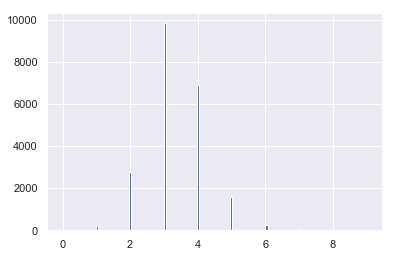

In [64]:
# histogram plot of bedrooms
sns.set()
plt.hist(data["bedrooms"],bins=bins_len(data["bedrooms"].count()))
plt.show()

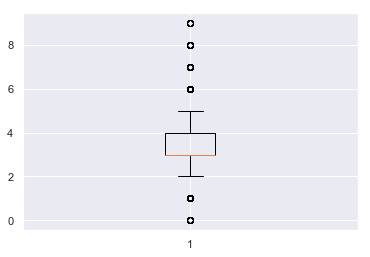

In [65]:
# boxplot of the bedrooms
plt.boxplot(data["bedrooms"])
plt.show()

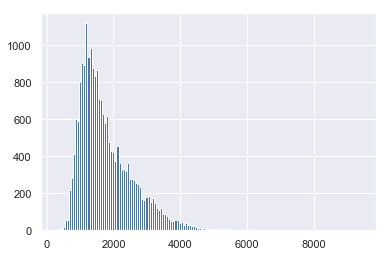

In [66]:
# plt of sqft above
plt.hist(data["sqft_above"],bins=bins_len(data["sqft_above"].count()))
plt.show()

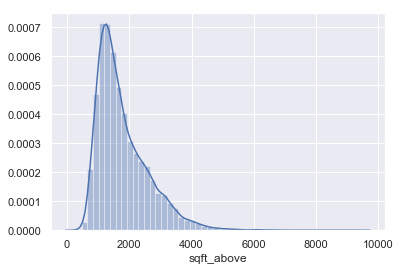

In [67]:
sns.distplot(data["sqft_above"])
plt.show()

# EDA

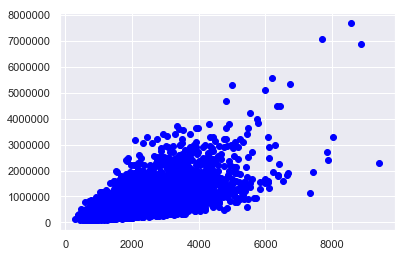

In [68]:
# Relation between price and sqft above
plt.scatter(data["sqft_above"],data["price"],color="blue")
plt.show()

In [69]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

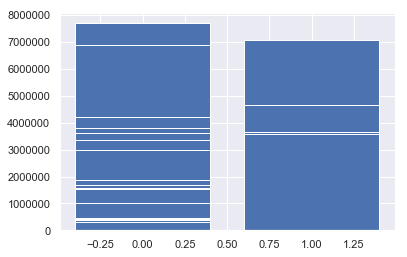

In [70]:
plt.bar(data["waterfront"],data["price"])
plt.show()

In [71]:
data["waterfront"].value_counts()
# there are total 21445 houses are there where they dont have waterfront

0.0    21445
1.0      163
Name: waterfront, dtype: int64

In [72]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [73]:
# calulating average price of the house by zipcode
data.groupby("zipcode")["price"].mean()

zipcode
98001.0    2.808047e+05
98002.0    2.342840e+05
98003.0    2.941113e+05
98004.0    1.356585e+06
98005.0    8.101649e+05
98006.0    8.601067e+05
98007.0    6.171051e+05
98008.0    6.455074e+05
98010.0    4.236660e+05
98011.0    4.903515e+05
98014.0    4.556171e+05
98019.0    4.247887e+05
98022.0    3.157093e+05
98023.0    2.867328e+05
98024.0    5.805268e+05
98027.0    6.169906e+05
98028.0    4.624800e+05
98029.0    6.126536e+05
98030.0    2.961880e+05
98031.0    3.005399e+05
98032.0    2.512962e+05
98033.0    8.037195e+05
98034.0    5.216529e+05
98038.0    3.668676e+05
98039.0    2.160607e+06
98040.0    1.194230e+06
98042.0    3.116321e+05
98045.0    4.394711e+05
98052.0    6.452315e+05
98053.0    6.781631e+05
               ...     
98092.0    3.349211e+05
98102.0    9.012583e+05
98103.0    5.848276e+05
98105.0    8.637148e+05
98106.0    3.189813e+05
98107.0    5.790534e+05
98108.0    3.556785e+05
98109.0    8.796236e+05
98112.0    1.095499e+06
98115.0    6.199005e+05
98116.0 

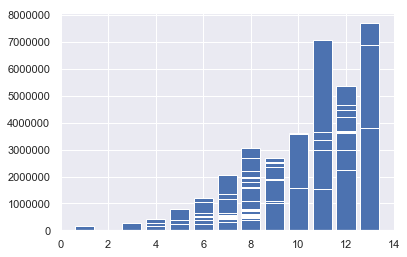

In [74]:
sns.set()
plt.bar(data["grade"],data["price"])
plt.show()

In [75]:
#checking the corealtion between each and every variable
data.corr().style.background_gradient(cmap="coolwarm")

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.0166802,0.00270682,-0.00566703,-0.01215,-0.132132,0.0169303,-0.00272667,0.0117431,-0.0238493,0.00820676,-0.0108176,-0.00497072,0.0214991,-0.0167059,-0.00828716,-0.00190033,0.0208183,-0.00288719,-0.138823
price,-0.0166802,1,0.316409,0.518856,0.702047,0.0896826,0.24501,0.266398,0.397209,0.0363609,0.667455,0.605595,0.323642,0.0539725,0.126547,-0.0530997,0.306997,0.0215897,0.585388,0.0824685
bedrooms,0.00270682,0.316409,1,0.502348,0.592618,0.0332331,0.183996,-0.0065237,0.0819254,0.0254593,0.368703,0.492167,0.308821,0.161156,0.0180823,-0.157404,-0.0109294,0.134942,0.404825,0.0308303
bathrooms,-0.00566703,0.518856,0.502348,1,0.701682,0.0900735,0.326711,0.0654811,0.202377,-0.0666167,0.591408,0.599473,0.334345,0.377663,0.0691615,-0.143977,0.049186,0.149203,0.497591,0.0870392
sqft_living,-0.01215,0.702047,0.592618,0.701682,1,0.172912,0.322069,0.103871,0.284482,-0.0587238,0.762903,0.876652,0.434719,0.318234,0.0552338,-0.199264,0.0525077,0.240258,0.75657,0.183373
sqft_lot,-0.132132,0.0896826,0.0332331,0.0900735,0.172912,1,-0.0019384,0.0216001,0.0747195,-0.00893048,0.113613,0.183541,0.0153518,0.0530429,0.00769512,-0.129583,-0.0856664,0.229512,0.144601,0.718554
floors,0.0169303,0.24501,0.183996,0.326711,0.322069,-0.0019384,1,0.0258442,0.0281022,-0.223288,0.407828,0.488413,-0.245712,0.3817,0.0152461,-0.0225389,0.0646294,0.0889132,0.242813,-0.0108879
waterfront,-0.00272667,0.266398,-0.0065237,0.0654811,0.103871,0.0216001,0.0258442,1,0.401915,0.0166685,0.0827755,0.0720909,0.0806587,-0.0261822,0.09295,0.0302829,-0.0142666,-0.0419198,0.0864654,0.0306994
view,0.0117431,0.397209,0.0819254,0.202377,0.284482,0.0747195,0.0281022,0.401915,1,0.0461232,0.251215,0.167616,0.276737,-0.0536644,0.104067,0.0849964,0.00616196,-0.0785253,0.280351,0.0725805
condition,-0.0238493,0.0363609,0.0254593,-0.0666167,-0.0587238,-0.00893048,-0.223288,0.0166685,0.0461232,1,-0.144583,-0.158177,0.174186,-0.361389,-0.0604876,0.00298371,-0.0150786,-0.106424,-0.092725,-0.00336843


C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


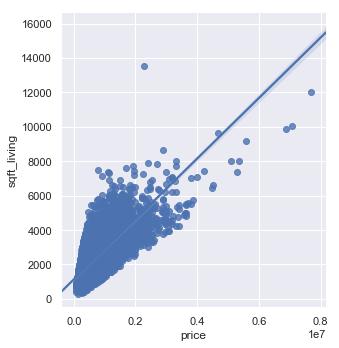

In [76]:
sns.lmplot(data=data,x="price",y="sqft_living")
plt.show()

In [77]:
# by above corealtion graph we can see some factors are here that has no srong relation with price we should have to 
# deal with that

In [78]:
# lets start modeling the data
# before that split the data as 70-30 train and test data

In [79]:
from sklearn.model_selection import train_test_split
traindata,testdata =train_test_split(data,test_size=0.3)

In [80]:
# shapes train and test data
print(traindata.shape)
print(testdata.shape)
print(data.shape)

(15125, 21)
(6483, 21)
(21608, 21)


In [81]:
col=['id','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

x=traindata.loc[:,col].values
y=traindata.iloc[:,2].values

In [82]:
# we have dropped the date column

In [83]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
Lm=LinearRegression()
Lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
#printing the intercept
print(Lm.intercept_)
print(Lm.coef_)

6680382.002063009
[-1.12312260e-06 -3.53976337e+04  4.43351247e+04  1.03537011e+02
  1.89001919e-01  1.08030911e+04  6.62551375e+05  5.01003529e+04
  2.68026119e+04  9.59094448e+04  6.79582531e+01  3.55787584e+01
 -2.55058518e+03  2.21339528e+01 -5.50872772e+02  5.97582920e+05
 -1.90372186e+05  2.80167055e+01 -4.69043142e-01]


In [85]:
# Predictions from our model as you know we have splitted the data 70-30 ratio
# now we use test data 30 portion data for predictions

In [86]:
# assigning the x and y variables for test data
x_test=testdata.loc[:,col].values
y_test=testdata.iloc[:,2].values

In [120]:
predictions=Lm.predict(x_test)

In [121]:
# lets checking the the rmse and r2 value
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R2:",metrics.r2_score(y_test,predictions))


MAE: 128649.75824041692
MSE: 45820073972.92143
RMSE: 214056.24021018736
R2: 0.6864219614589239


In [123]:
def adj_R2(y_test,predictions,p):
    r2=metrics.r2_score(y_test,predictions)
    n=len(y_test)
    return 1-(1-r2)*(n-1)/(n-p-1)
    

In [124]:
print(adj_R2(y_test,predictions,x_test.shape[1]))

0.6855001012187443


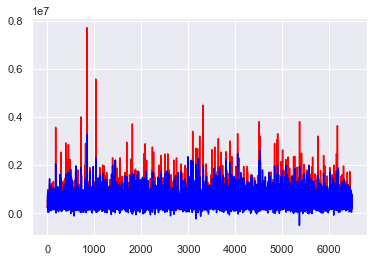

In [129]:
plt.plot(y_test,color="red")
plt.plot(predictions,color="blue")
plt.show()

In [130]:
# the above model has not that much accurate
# so we modify that data 

In [134]:
# checking the signififcance of variables with respect to price
import statsmodels.api as sm
est=sm.OLS(y,x)
est1=est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2150.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:43:05   Log-Likelihood:            -2.0569e+05
No. Observations:               15125   AIC:                         4.114e+05
Df Residuals:                   15107   BIC:                         4.116e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.081e-06   5.59e-07     -1.932      0.0

In [135]:
# by above we can say that only one factor is there which it is not significant that is "id" variable


In [139]:
#lets drop the column from data
data.drop(["id"],axis=1,inplace=True)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [140]:
# lets drop the "id" column from train data and assign that into x and try
traindata.drop(["id"],axis=1,inplace=True)


C:\Users\Avinash\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [142]:
# and also dropping data column
traindata.drop(["date"],axis=1,inplace=True)

In [145]:
traindata.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [146]:
col=[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

In [147]:
# assigning again variables into x and y
x=traindata.loc[:,col].values
y=traindata.iloc[:,0].values

In [148]:
# model2
Lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
print(Lm.intercept_)
print(Lm.coef_)

6420714.74357967
[-3.54078654e+04  4.44030929e+04  1.03551164e+02  1.94218633e-01
  1.07234480e+04  6.62820965e+05  4.99587971e+04  2.68973459e+04
  9.57751184e+04  6.80284212e+01  3.55227434e+01 -2.54896651e+03
  2.22890514e+01 -5.50467221e+02  5.97593909e+05 -1.92099716e+05
  2.81440037e+01 -4.55636724e-01]


In [150]:
# checking the summary
est=sm.OLS(y,x)
est1=est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     8907.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:04:58   Log-Likelihood:            -2.0569e+05
No. Observations:               15125   AIC:                         4.114e+05
Df Residuals:                   15108   BIC:                         4.115e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -3.51e+04   2281.120    -15.385      0.0

In [151]:
# by dropping the "Id" column from train data we see that total 0.9 R2 value we get
# it means model interprtability is 90 

In [152]:
# now we predict the model using test data

In [153]:
# at first we should have to drop the id and date column from test data 

In [154]:
testdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [155]:
testdata.drop(["id","date"],axis=1,inplace=True)

C:\Users\Avinash\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [156]:
testdata.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [157]:
x_test=testdata.loc[:,col].values
y_test=testdata.iloc[:,0].values

In [158]:
# lets predict
predictions=Lm.predict(x_test)


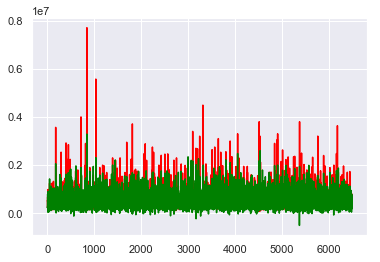

In [161]:
# lets comapre the predictions and y_test by plotting the graph
sns.set()
plt.plot(y_test,color="red")
plt.plot(predictions,color="green")
plt.show()

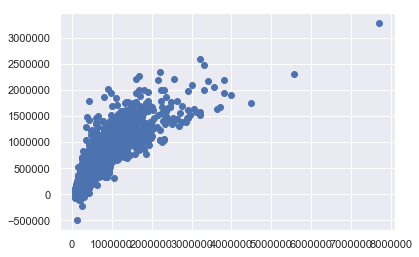

In [163]:
plt.scatter(y_test,predictions)
plt.show()